 Max. growth rate = 0.05877306239739611  1/d


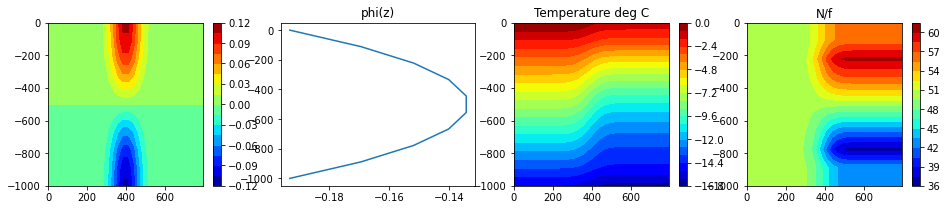

In [1]:
import numpy as np
import pylab as plt

Ri  = 2000    # Richardson number 
delta = 0.02  # aspect ratio
f0   = 1e-4        # Coriolis freq.
H0   = 1000.0      # total depth
Ro = np.sqrt( 1./Ri) # Rossby number 
N0 = f0/delta        # stability freq.
U0 = Ro*N0*H0        # mean flow
M0 = np.sqrt(f0*U0/H0)    # meridional buoyancy gradient   
Lr = N0*H0/f0          # Rossby radius
om_max = np.sqrt(5./54)/np.sqrt(1+Ri)*f0   # growth rate of fastest growing mode
kmax   = 1./ ( np.sqrt(2./5.)*np.sqrt(1+Ri)*M0**2/f0**2*H0 )  # wave number of fastest growing mode

Ly = 4*2/kmax  *np.pi
jet_scale = 0.1*Ly

grav = 9.81
rho0 = 1024.
alpha = -1.67e-4*rho0

ny,nz = 30,10
yt = np.linspace(0,Ly,ny)
zt = np.linspace(0,H0,nz)-H0
dy,dz=yt[1]-yt[0],zt[1]-zt[0]
YT,ZT = np.meshgrid(yt,zt)

u  = U0*np.exp(-(YT-Ly/2)**2/jet_scale**2 )*np.cos(np.pi*ZT/H0)  
uz=u*0
uz[1:-1,:] = (u[2:,:]-u[:-2])/(2*dz) 
uz[0,:],uz[-1,:] =uz[1,:],uz[-2,:]
# rho0 f u = - p_y,  p_z = -g rho,  f u_z = g rho_y/rho0 = - b_y
b = N0**2*ZT - np.cumsum(dy*uz*f0,axis=1)
bz = b*0
bz[1:-1,:] = (b[2:,:]-b[:-2,:])/(2*dz)
bz[0,:],bz[-1,:] = bz[1,:],bz[-2,:]

d=f0/N0/kmax
fxa=(np.exp(H0/d)+np.exp(-H0/d))/(np.exp(H0/d)-np.exp(-H0/d))
c1 =  1+0.25*(H0/d)**2 - H0/d*fxa 
c1 = (np.sqrt( complex(c1 , 0) )*d/H0+0.5)*U0
A = (U0-c1)/U0*H0/d

phiz = A/d*np.sinh(zt/d)+np.cosh(zt/d)/d

print(' Max. growth rate =' , om_max*86400,' 1/d')
# b=-g rho/rho_0,  drho = drho/DT dT  = alpha dT
t=-b*rho0/grav/alpha

plt.figure(figsize=(4*4,3)) 
plt.set_cmap('jet')
plt.subplot(1,4,1)
co=plt.contourf(yt/1e3,zt,u,20)
plt.colorbar(co)
plt.subplot(1,4,2)
plt.plot(0.2*np.abs(phiz)*rho0/grav/alpha,zt)
plt.title('phi(z)')
plt.subplot(1,4,3)
co=plt.contourf(yt/1e3,zt,t,20)
plt.colorbar(co)
plt.title('Temperature deg C')
plt.subplot(1,4,4)
co=plt.contourf(yt/1e3,zt,np.sqrt(bz)/f0,20)
plt.colorbar(co)
plt.title('N/f')
plt.show()